In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

***Function definitions***

In [3]:
#LCG function to create U(0,1) random variables
########################
#Inputs:
#n - number of RVs to create
#z0 - seed
#m- modulus
#a-multiplier
#c-constant additive term
#Outputs:
#array of n rows containing (U,z)

def LCG(n, z0, m, a, c):
    i=0
    u=0
    out=np.empty([n, 2])
    z=z0
    while i<=n-1:
        z=(a*z+c)%m
        out[i]=[z/m,z]
        i+=1
    return out
        
        
    


In [4]:
##################################
#Generate an ECDF from data
############################
#Input: data array
#Output: ECDF array
def generateECDF(data):
    dataSort=np.sort(data, axis=None)
    n=len(data)
    ECDF=np.empty(n)
    for i in range(len(dataSort)):
        x=(1/n)*(i+1)
        ECDF[i]=x
        i+=1
    return ECDF
        

In [5]:
#####################################
#Runs a 2 dimensional serial test, dividing the unit square into k bins
#####################################
#Input:
#data for testing - 2-d array
#k - the number of bins
#Output: Count of data points in each 2-d bin
def serialTestFor2D(data, k):
    d=2
    BinCount=np.zeros((k,k))
    for x in data:
        BinXCounter=0
        while BinXCounter<k:
            if (x[0]>=BinXCounter*(1/k) and (x[0]<(BinXCounter+1)*(1/k))):
                BinYCounter=0
                while BinYCounter<k:
                    if (x[1]>=BinYCounter*(1/k) and (x[1]<(BinYCounter+1)*(1/k))):
                        BinCount[BinXCounter, BinYCounter]+=1
                    BinYCounter+=1
            BinXCounter+=1
    return(BinCount)

In [6]:
##########################
#Runs an autocorrelation test 
#########################
#Input:
#data - 1-d array
#lag - integer value for calculating autocorrelation
#Output:
#rho- correlation coefficient
#A- test-statistic 

def AutoCorrelationTest(data, lag):
    h=((len(data)-1)//lag)-1
    Expectations=np.empty((h+1, 1))
    i=0
    j=0
    while i in range(h+1):
        if j+lag<len(data):
            Expectations[i]=data[j]*data[j+lag]
            j+=lag
            i+=1
        else:
            break
    rho=12*np.sum(Expectations)/(h+1)-3
    A=rho/(np.sqrt((13*h+7)/(h+1)**2))
    return(rho, A)
    

In [7]:
##########################
#Inverse function for Weibull CDF
############################
#Input:
#U - float between (0,1)
#alpha, beta, parameters for Weibull
#Output
#x - Weibull distributed random variable
def WeibullRVGenerator(U, alpha, beta):
    x=alpha*(-np.log(1-U))**(1/beta)
    return x

In [8]:
#####################
#Modified inverse function for Weibull variable with p=0.2 used for question 4 
######################
#Input:
#U - float between (0,1)
#alpha, beta, parameters for Weibull
#Output
#x - random variable from modified distribution
def WeibullRVGeneratorMod(U, alpha, beta):
    x=alpha*(-np.log((1-U)/0.2))**(1/beta)
    return x

In [9]:
########################
#Uniform Random number generator on a specified interval
###############################
#Input
#U - a float betweek (0,1)
#a,b - bounds of interval
#Output:
# x - uniform RV on (a,b)  
def UniformAB(U, a, b):
    x=(b-a)*U+a
    return x

*********************************************

\subsection{Question 1}


**KS test**


In [10]:
#Create n=25 U(0,1) random variables and sort in ascending order

n=25
z0=568
m=4096
a=3649
c=1581
LCGData=LCG(n, z0, m, a, c)[:,0]

display('The  LCG generated data:')
display(np.round(LCGData, 4))
LCGDataSort=np.sort(LCGData, axis=0)
LCGDataSort=LCGDataSort.reshape(25,1)



'The  LCG generated data:'

array([0.3997, 0.7388, 0.156 , 0.6514, 0.2249, 0.8765, 0.6062, 0.4141,
       0.3   , 0.2642, 0.3064, 0.4268, 0.6252, 0.9019, 0.2566, 0.6895,
       0.2004, 0.7896, 0.4568, 0.2021, 0.0256, 0.9272, 0.907 , 0.9648,
       0.1008])

In [11]:
#Generate an ECDF for the data
ECDFData=generateECDF(LCGData)
ECDFData=ECDFData.reshape(25,1)


In [12]:
#Run a KS test
#############
#Compute the distance variables of |Fn(x)-F(x)|
DPlus=np.abs(ECDFData.reshape(25,1)-LCGDataSort.reshape(25,1))
DMinus=np.empty(25)
for i in range(len(LCGDataSort)):
    if i==0:
        DMinus[i]=LCGDataSort[i]
    else:
        DMinus[i]=np.abs(ECDFData.reshape(25,1)[i-1]-LCGDataSort[i])  #Absolute value for magnitude of distance
        
DMinus=DMinus.reshape(25,1)

#Combine D+, D- into an array
D=np.concatenate((DPlus, DMinus), axis=1)

#Find maximum of D
DMax=np.max(D)
display('D='+str(DMax))

#Compute test statistic from DMax
KSStat=round((np.sqrt(n)+0.12+0.11/np.sqrt(n))*DMax, 2)
display('KS test statistic='+str(KSStat))






'D=0.10321289062500005'

'KS test statistic=0.53'

In [13]:
stats.kstest(LCGData, 'uniform')

KstestResult(statistic=0.10321289062500005, pvalue=0.9527306510698654)

-------------------------

**Serial test**


In [14]:
###########################
##Running a serial test on 50 U(0,1 ) RVs
##############
#Generate 50 U(0,1) RVs
n=50
LCGData50=LCG(n, z0, m, a, c)[:,0]
LCGData50=LCGData50.reshape(50,1)

#Pair the data into 2-d vectors
LCGDataPaired=LCGData50.reshape((25,2))


k=3
d=2
#Running a 2-d serial test with k=3
ObservedCounts=serialTestFor2D(LCGDataPaired, k)
display('Observed Counts')

ObservedCounts=ObservedCounts.reshape(k**d, 1)
display(ObservedCounts)
ExpectedCounts=n/(2*k**d)
display('Expected Counts='+str(ExpectedCounts))

SerialTestStat=np.sum((ObservedCounts-ExpectedCounts)**2/ExpectedCounts)
display('The test statistic for serial test is '+str(SerialTestStat))

#Get a p-value using chi-sq(n-1) 
display('The probability of observing a chi-squared test statistic=' +str(SerialTestStat)+' assuming the data came from a distribution of k^d-1 degrees of freedom')
display(round(1-stats.chi2.cdf(SerialTestStat, k**d-1),2))


'Observed Counts'

array([[3.],
       [3.],
       [5.],
       [2.],
       [1.],
       [4.],
       [0.],
       [2.],
       [5.]])

'Expected Counts=2.7777777777777777'

'The test statistic for serial test is 8.48'

'The probability of observing a chi-squared test statistic=8.48 assuming the data came from a distribution of k^d-1 degrees of freedom'

0.39


---------------
**Autocorrelation test** 


In [15]:
######################
#Running an autocorrelation test on 40 U(0,1) RVs
##################
#Generating 40 RVs
LCGAuto=LCG(40, z0, m, a, c)[:,0]
#Running the autocorrelation test with lag =4

AutoTest=AutoCorrelationTest(LCGAuto, 4)
display('Autocorrelation Test output:')
display(np.round(AutoTest, 4))

#Calculating the 
pval=round(2*stats.norm.cdf(AutoTest[1]), 3)
display('The probability of observing the data, assuming that the null hypothesis (that there is no correlation between the data) is true: '+str(pval))

'Autocorrelation Test output:'

array([-2.3034, -1.9676])

'The probability of observing the data, assuming that the null hypothesis (that there is no correlation between the data) is true: 0.049'

-------------------------------
\section*{Question 2}
 

'5 Random numbers from Weibull(2,4)'

array([1.6904, 2.1528, 1.2835, 2.0263, 1.4208])

Text(0.5,1,'Histogram of x from Weibull alpha, beta = 2,4')

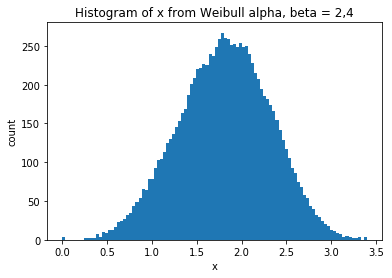

In [16]:
###########################
#Generating Random numbers based on inversion of Weibull distribution
############
#Generate 5 U(0,1) RVs
n=10000
LCGDataWeibull=LCG(n, z0, m, a, c)[:,0]

#Inverse Weibull of data with Weibull parameters alpha and beta
alpha=2
beta=4

out=WeibullRVGenerator(LCGDataWeibull, alpha, beta)
display('5 Random numbers from Weibull(2,4)')
display(np.round(out[0:5], 4))
plt.hist(out, bins=100)
plt.xlabel('x')
plt.ylabel('count')
plt.title('Histogram of x from Weibull alpha, beta = 2,4')

\section*{Question 3}



'Three non-uniform RVs generated from f:'

array([2.5111, 0.9802, 1.4128])

Text(0.5,1,'Histogram of x')

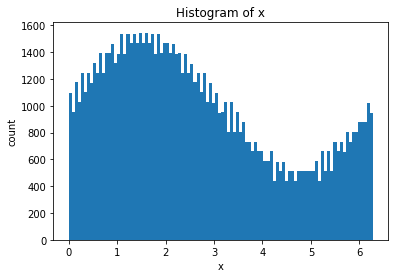

In [17]:
######
#Generating RV by acceptance rejection on given f
############
ntotal=100000
z=z0
A=0
B=2*np.pi
K=3/(4*np.pi)
out=np.empty(ntotal)

f=lambda x: (1/(2*np.pi)+np.sin(x)/(4*np.pi))


for i in range(ntotal):
    accept=0
    x=0
    while accept==0:
        LCGData=LCG(1, z, m, a, c)
        U1=LCGData[:,0]
        z=LCGData[:,1]
        U1=UniformAB(U1,A,B)
        LCGData=LCG(1, z, m, a, c)
        U2=LCGData[:,0]
        z=LCGData[:,1]
        U2=UniformAB(U2,0,K)
        if U2<=f(U1):
            accept=1
            x=U1
    out[i]=x
#f=lambda x: (1/(2*np.pi)+np.sin(x)/(4*np.pi))
display('Three non-uniform RVs generated from f:')
display(np.round(out[0:3], 4))
plt.hist(out, bins=100)
plt.xlabel('x')
plt.ylabel('count')
plt.title('Histogram of x')
    

\section*{Question 4}

***Inversion***

'5 RVs generated:'

array([[5.],
       [5.],
       [5.],
       [5.],
       [5.]])

Text(0.5,1,'Histogram of X by inversion')

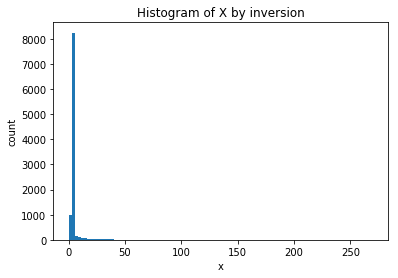

In [18]:
#########
#Generating RV by inversion of F(X)
#######
n=10000
z=z0
alpha=6
beta=0.5
F=lambda x: 0.2*(1-np.exp(-(x/alpha)**beta))
out=np.empty((n,1))
Fminus=0.2*F(5)

Fplus=Fminus+0.8

for i in range(n):
    LCGSample=LCG(1, z, m, a, c)
    U=LCGSample[0][0]
    z=LCGSample[0][1]
    if U<=Fminus:
        X=WeibullRVGenerator(U, alpha, beta)
    elif U>Fminus and U<Fplus:
        X=5
    else:
        X=WeibullRVGeneratorMod(U, alpha, beta)
    out[i]=X
    
display('5 RVs generated:')
display(np.round(out[0:5], 5))

plt.hist(out, bins=100)
plt.xlabel('x')
plt.ylabel('count')
plt.title('Histogram of X by inversion')
  


-----------------

\section*{Question 5}

***Composition***


'5 RVs generated:'

array([[5.],
       [5.]])

Text(0.5,1,'Histogram of x by composition')

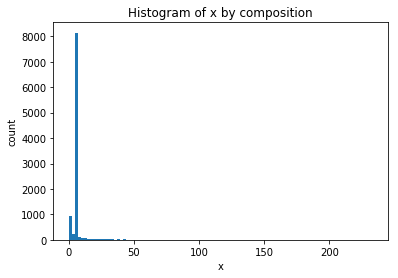

In [19]:
#########
#Generating RV by composition of F(X)
#######

n=10000
z=z0
alpha=6
beta=0.5
out=np.empty((n,1))
for i in range(n):
    LCGSample=LCG(1, z, m, a, c)
    U1=LCGSample[0][0]
    z=LCGSample[0][1]
    LCGSample=LCG(1, z, m, a, c)
    U2=LCGSample[0][0]
    z=LCGSample[0][1]
    if U1<=0.8:
        X=5
    else:
        X=WeibullRVGenerator(U2, alpha, beta)
    out[i]=X
    
display('5 RVs generated:')
display(out[0:2])


plt.hist(out, bins=100)
plt.xlabel('x')
plt.ylabel('count')
plt.title('Histogram of x by composition')